In [122]:
import tweepy
import pandas as pd
import requests
import os
import io
from pathlib import Path
from io import BytesIO
import datetime as dt
import numpy as np
import json
import pprint
import matplotlib.pyplot as plt

<!-- 1. [Gathering Data](#Gather)
2. [Asses Data](#Asses)
    
    2.1 [Twitter archive issues](#twitter_issue)
3. [] -->

<h2>Gather the data files

<h3>Gather the Twitter archive

In [123]:
# Read in Twitter archive
folder = Path(r"D:\OneDrive - MVGM\WerkbestandenYannick\Werkmap_Python\Projecten\Udacity\Nanodegree_data_analyst\Chapter4_data_wrangling\project4_data_wrangling")
twitter_archive_source = pd.read_csv(folder / "twitter-archive-enhanced.csv")
twitter_archive = twitter_archive_source.copy(deep=True)

<h3>Gather the image_data

In [124]:
# Get image data
# I know requests is requested but this feels much easier and less polluting.
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_data_source = pd.read_csv(image_url, engine='python', sep='\t')
image_data = image_data_source.copy(deep=True)

<h3>Gather the tweet information

consumer_key = 'bGlZRqfTCeKDAxmWXGemvMe1j'
consumer_secret = 'PD6d3DS0QL774NW1DwnBe1u8AMTJZqCgzeAEHUfyBpjWDm3BSo'
access_token = '152754563-pWrceahhtELN2c1qfCsAec9CC5cS865SIHzs3Oko'
access_secret = 'FFEfUKTEgrFAvXZOuoz4C7JOb7yshlrfmBqBkTAllYB1k'

In [125]:
# Set up Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [126]:
# Download Tweet information
# # Write all twitter data to json.txt
# tweet_id_list = twitter_archive.tweet_id
# with open("tweet_json.txt","w") as tweet_json:
#     for tweet_id in tweet_id_list[:5]:
#         try:
#             json_tweet_line = api.get_status(tweet_id, tweet_mode="extended")
#             json.dump(json_tweet_line._json, tweet_json)
#             tweet_json.write("\n")
#         except:
#             continue

In [127]:
with open("tweet_json.txt", "r") as tweet_json_read:
    lines = [json.loads(j) for j in tweet_json_read]
    df_tweet_source = pd.json_normalize(lines)
df_tweet = df_tweet_source.copy(deep=True)

<h2>Assess

<h3>Visual asses twitter_archive

In [128]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<h3>Programmatic Assessment

In [129]:
twitter_archive.rating_numerator.value_counts(ascending=True)

204       1
121       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
143       1
182       1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
26        1
24        1
20        1
80        1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

<h3 id="twitter_issue">Issues found</h3>

Quality
<lu>
    <li>The source column contains html code which clutters the data.
    <li>The timestamp column is hard to read.
    <li>Some rating numerators seem way out of proportion. I.e. 1776 investigate those and fix them.
    <li>There are retweets in the data
</lu>

Tidiness
<lu>
    <li>The sorts of dogs are in 4 columns. It would be convenient to have them in one.
</lu>

<h2>Assess df_tweet

<h3>Visual assessment df_tweet

In [130]:
pd.set_option('max_columns',350)
df_tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,entities.media,extended_entities.media,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.utc_offset,user.time_zone,user.geo_enabled,user.verified,user.statuses_count,user.lang,user.contributors_enabled,user.is_translator,user.is_translation_enabled,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_image_url,user.profile_image_url_https,user.profile_banner_url,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,quoted_status_id,quoted_status_id_str,retweeted_status.created_at,retweeted_status.id,retweeted_status.id_str,retweeted_status.full_text,retweeted_status.truncated,retweeted_status.display_text_range,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.user_mentions,retweeted_status.entities.urls,retweeted_status.source,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.user.id,retweeted_status.user.id_str,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.location,retweeted_status.user.description,retweeted_status.user.url,retweeted_status.user.entities.url.urls,retweeted_status.user.entities.description.urls,retweeted_status.user.protected,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.created_at,retweeted_status.user.favourites_count,retweeted_status.user.utc_offset,retweeted_status.user.time_zone,retweeted_status.user.geo_enabled,retweeted_status.user.verified,retweeted_status.user.statuses_count,retweeted_status.user.lang,retweeted_status.user.contributors_enabled,retweeted_status.user.is_translator,retweeted_status.user.is_translation_enabled,retweeted_status.user.profile_background_color,retweeted_status.user.profile_background_image_url,retweeted_status.user.profile_background_image_url_https,retweeted_status.user.profile_background_tile,retweeted_status.user.profile_image_url,retweeted_status.user.profile_image_url_https,retweeted_status.user.profile_banner_url,retweeted_status.user.profile_link_color,retweeted_status.user.profile_sidebar_border_color,retweeted_status.user.profile_sidebar_fill_color,retweeted_status.user.profile_text_color,retweeted_status.user.profile_use_background_image,retweeted_status.user.has_extended_profile,retweeted_status.user.default_profile,retweeted_status.user.default_profile_image,retweeted_status.user.following,retweeted_status.user.follow_request_sent,retweeted_status.user.notifications,retweeted_status.user.translator_type,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.is_quote_status,retweeted_status.quoted_status_id,retweeted_status.quoted_status_id_str,retweeted_status.quoted_status.created_at,retweeted_status.quoted_status.id,retweeted_status.quoted_status.id_str,retweeted_status.quoted_status.full_text,retweeted_status.quoted_status.trunc

<h3>Programmatic assessment df_tweet

In [131]:
df_tweet.shape[0]

2354

In [132]:
df_tweet.isna().sum()

created_at                           0
id                                   0
id_str                               0
full_text                            0
truncated                            0
                                  ... 
place.country_code                2353
place.country                     2353
place.contained_within            2353
place.bounding_box.type           2353
place.bounding_box.coordinates    2353
Length: 326, dtype: int64

In [133]:
df_tweet['user.name'].unique()

array(['WeRateDogs™ (author)'], dtype=object)

<h3>Issues found in df_tweet

Assessing data problems in twitter archive

Quality
<lu>
    <li>The source column contains html information which clutters the data
    <li>Columns which do not contain information regarding the observations are in the table
    <li>Columns with only NaN values are in the table
    <li>There are empty lists in the table
    <li>Hashtags are not really straightforward
</lu>

<!-- Tidiness
<lu>
    <li>Display_text_range contains start and end of the displayed text range
</lu> -->

<h2>Assess image_data

<h3>Visual assessment image_data

In [134]:
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<h3>Programmatic assesment image_data

-

<h3>Issues image_data

Tidiness
<lu>
    <li>There are 3 predictions but this is not really concise

<h2>Clean

clean the twitter_archive data

<h4>Define</h4>twitter_archive date column needs to be converted for clearance
<h4>Code

In [135]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp).dt.date

<h4>Test</h4>

In [136]:
twitter_archive.timestamp.head(2)

0    2017-08-01
1    2017-08-01
Name: timestamp, dtype: object

<h4>Define</h4>twitter_archive source column needs to cleaned of html clutter
<h4>Code

In [137]:
twitter_archive.source = twitter_archive.source.apply(lambda x: x.split('">')[1].replace("</a>",""))

<h4>Test

In [138]:
twitter_archive.source.value_counts(dropna=False)

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

<h4>Define</h4>twitter_archive dog type column needs to be converted to 1 column
<h4>Code

In [139]:
# Fix dog types
def unique_list(l):
    temp_string = ";".join(list(set(l)))
    temp_string = temp_string.replace("None","unknown").rstrip(";unknown").replace(";unknown","")
    if 'dogg' in temp_string or 'pupp' in temp_string or 'floofer' in temp_string:
        return temp_string
    return np.nan

twitter_archive['dog_type'] = twitter_archive.apply(lambda x: unique_list(x[['doggo','floofer','pupper','puppo']]), axis=1)
twitter_archive.dog_type.unique()
twitter_archive = twitter_archive.drop(columns=["doggo","floofer","pupper","puppo"])

<h4>Test

In [140]:
twitter_archive.dog_type.value_counts(dropna=False)

NaN                     1976
unknown;pupper           245
unknown;dogg              83
unknown;pupp              29
unknown;doggo;pupper      12
unknown;floofer            9
unknown;puppo;dogg         1
unknown;floofer;dogg       1
Name: dog_type, dtype: int64

<h3>Clean</h3>
The json file

<h4>Define</h4>json date column needs to be converted for clearance
<h4>Code

In [141]:
# Fix date column
df_tweet.created_at = pd.to_datetime(df_tweet.created_at).dt.date

<h4>Test

In [142]:
df_tweet.created_at.head()

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: created_at, dtype: object

<h4>Define</h4>Delete all columns which are not specific for the observation but for the user
<h4>Code

In [143]:
# Delete all user columns
df_tweet = df_tweet[[c for c in df_tweet.columns if not 'user.' in c]]

<h4>Test

In [144]:
[c for c in df_tweet.columns if 'user.' in c]

[]

<h4>Define</h4>Clean the source column from html clutter
<h4>Code

In [145]:
# Fix source column
df_tweet.source = df_tweet.source.apply(lambda x: x.split('">')[1].replace("</a>",""))

<h4>Test

In [146]:
df_tweet.source.value_counts(dropna=False)

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

<h4>Define</h4>Delete all columns which only contain nans since they do not provide information
<h4>Code

In [147]:
# Delete all columns with only Nans
df_tweet = df_tweet[df_tweet.columns[(df_tweet.isna().sum() != 2353)]].copy(deep=True)

<h4>Test

In [148]:
df_tweet.isna().sum()

created_at                                        0
id                                                0
id_str                                            0
full_text                                         0
truncated                                         0
                                               ... 
quoted_status.possibly_sensitive               2326
quoted_status.possibly_sensitive_appealable    2326
quoted_status.lang                             2326
retweeted_status.entities.media                2191
retweeted_status.extended_entities.media       2191
Length: 98, dtype: int64

<h4>Define</h4>Split the display_text_range into a display_text_start and an display_text_end column
<h4>Code

In [149]:
# Split column range in start and end
display_columns = ['display_text_start','display_text_end']
df_tweet[display_columns] = pd.DataFrame(df_tweet.display_text_range.tolist(), columns=display_columns)
df_tweet = df_tweet.drop(columns=['display_text_range'])


<h4>Test

In [150]:
df_tweet[['display_text_start','display_text_end']].head()

,display_text_start,display_text_end
0,0,85
1,0,138
2,0,121
3,0,79
4,0,138


<h4>Define</h4>Merge the df_tweet dataframe with the twitter_archive on tweet_id and the image_data
<h4>Code

In [151]:
# Mount all datasources together
df_tweet_id = df_tweet.set_index('id').drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source'])
df = twitter_archive.set_index('tweet_id').join(df_tweet_id)
df_total = df.join(image_data.set_index('tweet_id'))

<h4>Test

In [152]:
df_total.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,created_at,id_str,full_text,truncated,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,entities.media,extended_entities.media,quoted_status_id,quoted_status_id_str,retweeted_status.created_at,retweeted_status.id,retweeted_status.id_str,retweeted_status.full_text,retweeted_status.truncated,retweeted_status.display_text_range,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.user_mentions,retweeted_status.entities.urls,retweeted_status.source,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.is_quote_status,retweeted_status.quoted_status.in_reply_to_status_id,retweeted_status.quoted_status.in_reply_to_status_id_str,retweeted_status.quoted_status.in_reply_to_user_id,retweeted_status.quoted_status.in_reply_to_user_id_str,retweeted_status.quoted_status.in_reply_to_screen_name,retweeted_status.quoted_status.geo,retweeted_status.quoted_status.coordinates,retweeted_status.quoted_status.place,retweeted_status.quoted_status.contributors,retweeted_status.retweet_count,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.possibly_sensitive,retweeted_status.possibly_sensitive_appealable,retweeted_status.lang,quoted_status.created_at,quoted_status.id,quoted_status.id_str,quoted_status.full_text,quoted_status.truncated,quoted_status.display_text_range,quoted_status.entities.hashtags,quoted_status.entities.symbols,quoted_status.entities.user_mentions,quoted_status.entities.urls,quoted_status.entities.media,quoted_status.extended_entities.media,quoted_status.source,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.possibly_sensitive_appealable,quoted_status.lang,retweeted_status.entities.media,retweeted_status.extended_entities.media,display_text_start,display_text_end,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017-08-01,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,None,None,None,None,None,NaN,None,False,8853.0,39467.0,False,False,False,False,en,[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206...","[{'id': 892420639486877696, 'id_str': '8924206...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,85.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.

<h4>Define</h4>Delete unnecessary and double columns after the merge
<h4>Code

In [153]:
# Drop columns which are double and unnecessary
df_total = df_total[[c for c in df_total.columns if 'retweeted_status' not in c and 'place.' not in c and 'quoted_status' not in c]]
df_total = df_total.drop(columns=['created_at','id_str','full_text'])

df_total = df_total[(df_total.in_reply_to_status_id!=df_total.in_reply_to_status_id)]

<h4>Test

In [154]:
len(df_total.columns)

45

In [155]:
df_total.in_reply_to_status_id.value_counts(dropna=False)

NaN    2278
Name: in_reply_to_status_id, dtype: int64

<h3>Clean</h3>
Cleaning image data

<h4>Define</h4>Merge the df_tweet dataframe with the twitter_archive on tweet_id
<h4>Code

In [156]:
# Add the race of dog which is most likely to be in the picture according to the image recognition data
df_total['dog_image_recog'] = np.where(df_total.p1_dog, df_total.p1, np.where(df_total.p2_dog, df_total.p2, np.where(df_total.p3_dog, df_total.p3, np.nan)))

<h4>Test

In [157]:
df_total.dog_image_recog.head()

tweet_id
892420643555336193                   NaN
892177421306343426             Chihuahua
891815181378084864             Chihuahua
891689557279858688    Labrador_retriever
891327558926688256                basset
Name: dog_image_recog, dtype: object

<h4>Define</h4>Delete the retweets
<h4>Code

In [158]:
# Delete all retweets
df_total = df_total[~df_total.text.str.startswith('RT @')]

<h4>Test

In [159]:
df_total[df_total.text.str.startswith('RT @')]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,truncated,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,entities.media,extended_entities.media,display_text_start,display_text_end,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_image_recog
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<h4>Define</h4>Delete the tweets which are not from WeRateDogs
<h4>Code

In [160]:
# Images are only predicted on WeRateDogs so if there is no data the tweet is not from WeRateDogs
df_total = df_total[~df_total.p1.isnull()]

<h4>Test

In [161]:
df_total.isna().sum()

in_reply_to_status_id            1971
in_reply_to_user_id              1971
timestamp                           0
source                              0
text                                0
expanded_urls                       0
rating_numerator                    0
rating_denominator                  0
name                                0
dog_type                         1668
truncated                           0
in_reply_to_status_id_str        1971
in_reply_to_user_id_str          1971
in_reply_to_screen_name          1971
geo                              1971
coordinates                      1971
place                            1971
contributors                     1971
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                  0
possibly_sensitive_appealable       0
lang                                0
entities.has

<h4>Define</h4>Set the columns to integers
<h4>Code

In [162]:
# retweet_count, favorite_count, display_text_start, display_text_end img_num as int values
col_to_int = ['retweet_count','favorite_count','display_text_start','display_text_end','img_num']
for c in col_to_int:
    df_total[c] = df_total[c].astype(int)

<h4>Test

In [163]:
df_total[col_to_int].head(3)

,retweet_count,favorite_count,display_text_start,display_text_end,img_num
tweet_id,,,,,
892420643555336193,8853,39467,0,85,1
892177421306343426,6514,33819,0,138,1
891815181378084864,4328,25461,0,121,1


<h4>Define</h4> Make hashtags more readable
<h4>Code

In [164]:
# set column to hashtag
df_total.update(df_total[df_total['entities.hashtags'].str.len()>0]['entities.hashtags'].apply(lambda x: x[0]['text']))

<h4>Test

In [165]:
df_total['entities.hashtags'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                       1949
BarkWeek                    8
PrideMonth                  3
Canada150                   1
WomensMarch                 1
NoDaysOff                   1
FinalFur                    1
dogsatpollingstations       1
notallpuppers               1
WKCDogShow                  1
ScienceMarch                1
PrideMonthPuppo             1
BellLetsTalk                1
K9VeteransDay               1
Name: entities.hashtags, dtype: int64

<h4>Define</h4>Change empty lists to nan values
<h4>Code

In [166]:
# Set empty lists to nan values
for c in ['entities.hashtags','entities.symbols','entities.user_mentions','entities.urls','entities.media','extended_entities.media']:
    df_total.loc[df_total[c].str.len()==0,c] = np.nan

<h4>Test

In [167]:
df_total['entities.hashtags'].value_counts()

BarkWeek                 8
PrideMonth               3
Canada150                1
WomensMarch              1
NoDaysOff                1
FinalFur                 1
dogsatpollingstations    1
notallpuppers            1
WKCDogShow               1
ScienceMarch             1
PrideMonthPuppo          1
BellLetsTalk             1
K9VeteransDay            1
Name: entities.hashtags, dtype: int64

<h4>Define</h4>Drop columns with only nan values
<h4>Code

In [168]:
# Drop columns with only NAN values
df_total = df_total.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id_str',
                                 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates',
                                 'place', 'contributors'])

<h4>Test

In [169]:
df_total.isna().sum()

timestamp                           0
source                              0
text                                0
expanded_urls                       0
rating_numerator                    0
rating_denominator                  0
name                                0
dog_type                         1668
truncated                           0
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                  0
possibly_sensitive_appealable       0
lang                                0
entities.hashtags                1949
entities.symbols                 1971
entities.user_mentions           1950
entities.urls                    1943
entities.media                      0
extended_entities.media             0
display_text_start                  0
display_text_end                    0
jpg_url                             0
img_num     

<h4>Define</h4>Investigate numerators with uncommon values
<h4>Code

In [170]:
# Adjust some scores
df_total.loc[786709082849828864,'rating_numerator']=9.75
df_total.loc[810984652412424192,'rating_numerator']=np.nan
df_total.loc[810984652412424192,'rating_denomerator']=np.nan
df_total.loc[778027034220126208,'rating_numerator']=11.27
df_total.loc[680494726643068929,'rating_numerator']=11.26
df_total['rating_score'] = df_total.rating_numerator/df_total.rating_denominator

<h4>Test

In [171]:
df_total.loc[778027034220126208,'rating_numerator']

11.27

<h2>Print the df_total to csv

In [172]:
df_total.to_csv('project_submission/twitter_archive_master.csv')

<h2> Analyse

Question and insight 1: What is the most popular dog according to tweets posted?

In [173]:
df_hist = df_total[df_total.rating_score<2].rename(columns={"rating_score":"Dog scores"})['Dog scores']

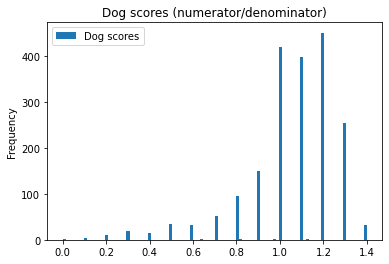

In [174]:
df_hist.plot(kind='hist',
             legend=True,
             bins=100, 
             xlabel='dog scores',
            title='Dog scores (numerator/denominator)'
            );

Question and insight 2: What is the tweet origin?

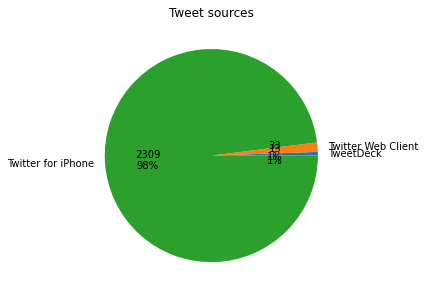

In [175]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df_total.groupby('source').size().plot(y='source', autopct=label_function, textprops={'fontsize': 10}, kind="pie")
plt.tight_layout()
plt.ylabel(None)
plt.title("Tweet sources")
plt.show()

Question and insight 3: What dogs are more common in the images?

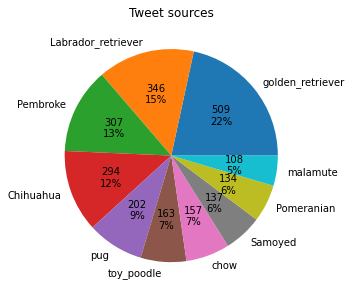

In [176]:
df_total.groupby('dog_image_recog').size().sort_values(ascending=False)[:10].plot(y='dog_image_recog', autopct=label_function, textprops={'fontsize': 10}, kind="pie")
plt.tight_layout()
plt.ylabel(None)
plt.title("Tweet sources")
plt.show()

What percentage is other dogs?

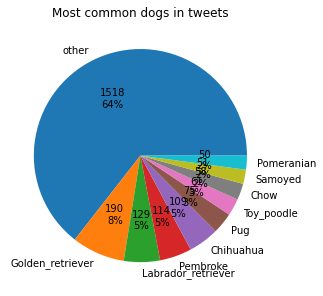

In [177]:
df_total.dog_image_recog = df_total.dog_image_recog.str.capitalize()
top10_dogs = list(df_total.groupby('dog_image_recog').size().sort_values(ascending=False)[:10].index)
df_hist = df_total.copy(deep=True)
df_hist.loc[~df_hist.dog_image_recog.isin(top10_dogs),'dog_image_recog'] = "other"
df_hist.groupby('dog_image_recog').size().sort_values(ascending=False)[:10].plot(y='dog_image_recog', autopct=label_function, textprops={'fontsize': 10}, kind="pie")
plt.tight_layout()
plt.ylabel(None)
plt.title("Most common dogs in tweets")
plt.show()